In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

In [2]:
#Careful. At the moment the different MG runs are correlated! Have to rewrite the MG simulation python script!
runs, number_batches, number_features_in_delay, number_samples_in_batch = ELPH_utils.load_MG()
print(np.shape(runs))

runs = np.reshape(runs, (number_batches,number_features_in_delay,number_samples_in_batch))
print(np.shape(runs))

(425000,)
(10, 85, 500)


(10, 85, 500)


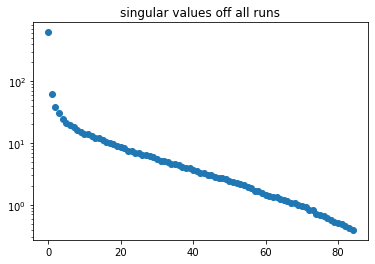

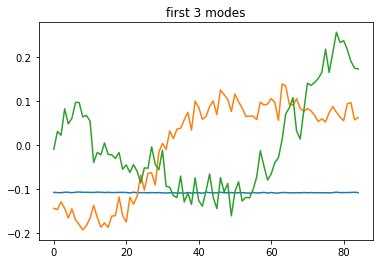

In [3]:
from ELPH_SVDAPPRX import SVDAPPRX


print(np.shape(runs))

model = SVDAPPRX(runs)
model.train()

plt.semilogy(model.S, 'o')
plt.title('singular values off all runs')
plt.show()

rdim = 3

for l in range(rdim):
  plt.plot(model.U[:,l],  label='Uhat_'+str(l))
plt.title('first ' + str(rdim) + ' modes')
plt.show()


0.24181141532188277


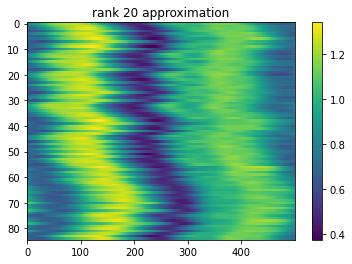

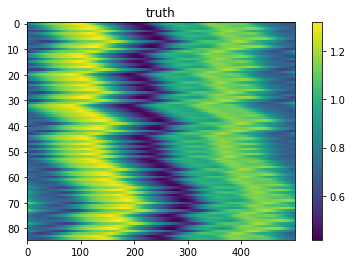

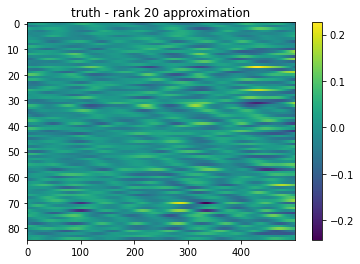

In [7]:
from ELPH_SVDAPPRX import SVDAPPRX


train_runs = runs
test_run = train_runs[7]

model = SVDAPPRX(train_runs)

#wcols = 1.0 + 10.*np.exp(-10.*np.linspace(0,1,runs[0].shape[1]))

model.train()


rdim = 20
recon = model.approx_single_run(test_run, rdim=rdim)
print(model.get_error(test_run, recon, norm='max'))

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('rank ' + str(rdim) + ' approximation')
plt.show()

plt.imshow(test_run, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth')
plt.show()

plt.imshow(test_run - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth - rank ' + str(rdim) + ' approximation')
plt.show()

